# Advanced topics in Interpolation

## Interpolation in Chebychev Points.

We have seen that interpolation in equidistant points leads to the Runge phenomenon. For practical purposes interpolation in equidistant points is therefore rarely done. Stability problems can be avoided by instead using Chebychev points. They are defined as follows:

$$
x_j = \cos(\frac{j\pi}{n}), \quad 0\leq j\leq n.
$$

Let's plot these points.

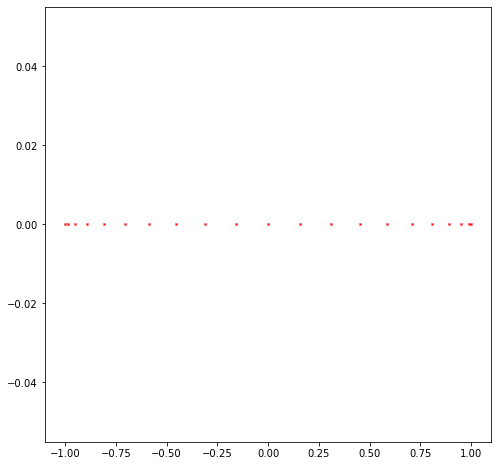

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

n = 20

angles = np.pi / n * np.arange(n + 1)
xcheb = np.cos(angles)

plt.figure(figsize=(8, 8))
plt.plot(xcheb, np.zeros(n + 1), 'rx', markersize=2)

We see that these points are clustered towards the boundary. This is the crucial property that helps us avoid the Runge phenomenon.

Chebychev points are closely related to Chebychev polynomials. Let $z = e^{i\theta}$ a complex number on the unit circle. Define $x = \frac{1}{2}(z + z^{-1}) = \cos\theta$ to be the real part of $z$. The $k$th Chebychev polynomial $T_k(x)$ is defined by

$$
T_k(x) = \frac{1}{2}(z^{k} + z^{-k}) = \cos(k\theta)
$$

It follows that the Chebychev points are the extrema of this polynomial since these are the points at which $T_k(x) = \pm 1$. It is not immediately obvious why the $T_k$ are polynomials. A short calculation gives

$$
\frac{1}{2}(z+z^{-1})(z^k + z^{-k}) = \frac{1}{2}(z^{k+1}+z^{-k-1}) + \frac{1}{2}(z^{k-1}+z^{-k+1})
$$

and therefore

$$
T_{k+1}(x) = 2xT_k(x) - T_{k-1}(x)
$$

with $T_0(x) = 1$.

It is possible to show that every Lipschitz continuous function in the interval $[-1, 1]$ can be represented as a Chebychev series of the form

$$
f(x) = \sum_{k=0}^{\infty} a_kT_k(x)
$$

with 

$$
a_k = \frac{2}{\pi}\int_{-1}^1\frac{f(x)T_k(x)}{\sqrt{1-x^2}}dx.
$$

There is a close relationship between interpolation in Chebychev points and expansion in a Chebychev series. But we will not discuss this further here.

## Convergence of the Chebychev Interpolation

We consider the following three functions

$$
f(x) = \frac{1}{1+25x^2}
$$

$$
g(x) = |x|
$$

$$
h(x) = x|x|
$$

The first function is the famous Runge function. It is analytic in $[-1, 1]$. The function $g$ is merely continuous and $h$ is one time continuously differentiable.

The following code implements interpolation in Chebychev points and for comparison also in equispaced points for these functions and plots the maximum error as the degree $n$ of the interpolation polynomial increases.


Text(0.5, 1.0, 'Interpolation in Chebychev points')

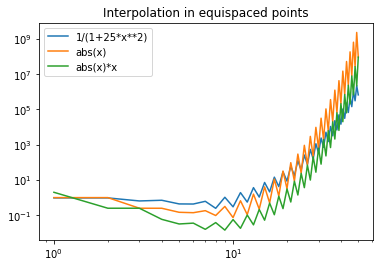

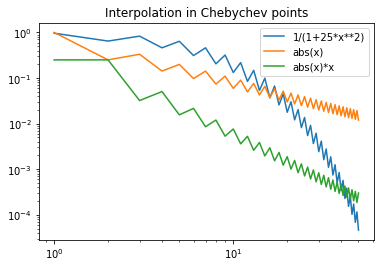

In [2]:
%matplotlib inline

from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

def compute_interpolation_error(n, fun, eval_points, mode='equispaced'):
    """
    Return the interpolation errror for a given number of n interpolation points.
    
    The function is defined via the callable fun. The evaluation points are stored
    in eval_points. The mode is allowed to be 'equispaced' or 'chebychev'.
    
    """
    
    
    if mode == 'equispaced':
        x = np.linspace(-1,1,n)
    elif mode == 'chebychev':
        k = np.arange(0,n+1)
        x = np.cos((k/n)*np.pi)
    else:
        raise ValueError("Unknown mode")
    
    y_interpolated = barycentric_interpolate(x,fun(x),eval_points)
    y_exact = fun(eval_points)
    
    error = np.max(np.abs(y_interpolated-y_exact))
    return error

abs_fun = [lambda x: np.abs(x), 'abs(x)']
abs_times_x_fun = [lambda x: np.abs(x)*x, 'abs(x)*x']
runge_fun = [lambda x: 1/(1+25*x**2), '1/(1+25*x**2)']

equispaced_points_funs = [runge_fun, abs_fun, abs_times_x_fun]
chebychev_funs = [runge_fun,abs_fun,abs_times_x_fun]

equispaced_points_errors = [[],[],[]]
chebychev_errors = [[],[],[]]


eval_points = np.linspace(-1,1,1000)
nn = range(1,51)

for i in range(3):
    for n in nn:
        equispaced_points_errors[i].append(compute_interpolation_error(n,equispaced_points_funs[i][0],eval_points,'equispaced'))
        chebychev_errors[i].append(compute_interpolation_error(n,chebychev_funs[i][0],eval_points,'chebychev'))
        
plt.figure()
for i in range(3):
    plt.loglog(nn,equispaced_points_errors[i],label=equispaced_points_funs[i][1])
plt.legend()
plt.title('Interpolation in equispaced points')

    
plt.figure()
for i in range(3):
    plt.loglog(nn,chebychev_errors[i],label=chebychev_funs[i][1])
plt.legend()
plt.title('Interpolation in Chebychev points')

Unsurprisingly, in the case of equidistant point the Runge phenomenon kicks in and we cannot observe convergence. On the other hand, we observe fast convergence using Chebychev points. One can show that the different convergence orders for the three functions in the case of Chebychev points are:

$$
\max_{-1\leq x\leq 1} |f(x) - p_n(x)| = \mathcal{O}(e^{-cn}), c > 0
$$

$$
\max_{-1\leq x\leq 1} |g(x) - p_n(x)| = \mathcal{O}(n^{-1})
$$

$$
\max_{-1\leq x\leq 1} |h(x) - p_n(x)| = \mathcal{O}(n^{-2})
$$

The higher the order of differentiability of a function, the faster the convergence of the Chebychev approximation. If the function is analytic in a complex neighborhood of $[-1, 1]$ then the convergence is even exponential as shown for the Runge function.

## Gibbs phenomenon

What happens if we want to interpolate a function with a Chebychev interpolant that is not smooth? The code below demonstrates a Chebychev interpolant for the function $f(x) = \text{sign}(x)$.

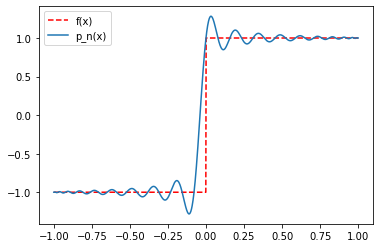

In [4]:
%matplotlib inline

#Runge's phenomenon in Python
from scipy.interpolate import barycentric_interpolate
import numpy as np
from matplotlib import pyplot as plt

n=40 # Number of interpolation points
m=1000 # Number of points at which to evaluate the interpolation pol.
angles = np.pi * np.arange(n + 1) / n
x = np.cos(angles)
y=np.sign(x)
xeval=np.linspace(-1,1,m)
yeval=barycentric_interpolate(x,y,xeval)
yexact=np.sign(xeval)
plt.plot(xeval,yexact,'r--',label='f(x)')
plt.plot(xeval,yeval,label='p_n(x)')
plt.legend()

We see that the interpolation polynomial overoscillates. This overoscillation is called Gibbs phenomenon. As the interpolation order increases these overoscillations do not disappear. This is a great problem for the numerical solution of partial differential equations that lead to sharp fronts, such as shocks, etc.

## A note on quadrature with Chebychev points and alternatives

One can develop stable high-order quadrature rules based on interpolation in Chebychev points instead of equidistant points. This is known as Clenshaw-Curtis quadrature. The most frequently used quadrature rules are so-called Gauss-quadrature rules. These are based on the idea of finding nodes and weights such that as high polynomials as possibles are integrated exactly (see also the corresponding exercise on the Week 9 Self-Check sheet).

A more simple alternative are summated rules. Consider for example the trapezoid rule

$$
\int_{a}^{b} f(x)dx \approx \frac{b-a}{2}(f(a) + f(b)).
$$

The idea of a summated rule is to split the interval $[a, b]$ into many small subintervals of size $h$ and to apply the low-order trapezoid rule in each subinterval. Let $x_j = a + hj$ with $h = (b-a)/n$ and $0\leq j\leq n$. We then apply the trapezoid rule in each interval $[x_j, x_{j+1}]$ to obtain

$$
\int_{a}^{b} f(x)dx \approx h\left(\frac{f(a)}{2} + \sum_{j=1}^{n-1} f(x_j) + \frac{f(b)}{2}\right).
$$
Such a summated rule is very stable and simple to implement. In practice, summated rules are used to integrate functions that have a very low smoothness order. For very smooth functions high-order Gauss or Clenshaw-Curtis rules are usually preferable.
